# Machine Learning

Supervised Learning:
1. Regression
2. Classification

Unsupervised Learning:
1. Clustering

Steps to implement Liner Regression:
1. Importing required Libraries (Scikit Learn)
2. Gathering pre-processed data
3. Choosing the right model
4. Defining our target(y) and feature(x)
5. Splitting our data into training and testing part(X-train, Y-train, X-test, Y-test)
6. Train our model
7. Validating our data
8. Model evaluation (accuracy etc.)
9. Visualisation

In [55]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [41]:
# Load the dataset
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [43]:
# Check for duplicates
df[df.duplicated()].shape
df = df.drop_duplicates()
df.shape

(9873, 6)

In [44]:
# Check for missing values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     9873 non-null   int64 
 1   Previous Scores                   9873 non-null   int64 
 2   Extracurricular Activities        9873 non-null   object
 3   Sleep Hours                       9873 non-null   int64 
 4   Sample Question Papers Practiced  9873 non-null   int64 
 5   Performance Index                 9873 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 539.9+ KB


In [46]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [51]:
df = df.rename(columns={'Hours Studied': 'Study_Hours', 'Previous Scores': 'Previous_Scores', 'Extracurricular Activities': 'Extra_Activities', 'Sleep Hours': 'Sleep_Hours', 'Sample Question Papers Practiced': 'Sample_Papers_Practiced', 'Performance Index': 'Performance_Index'})
df.head()

,Study_Hours,Previous_Scores,Extra_Activities,Sleep_Hours,Sample_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Extra_Activities'] = le.fit_transform(df['Extra_Activities'])
df.head()

,Study_Hours,Previous_Scores,Extra_Activities,Sleep_Hours,Sample_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


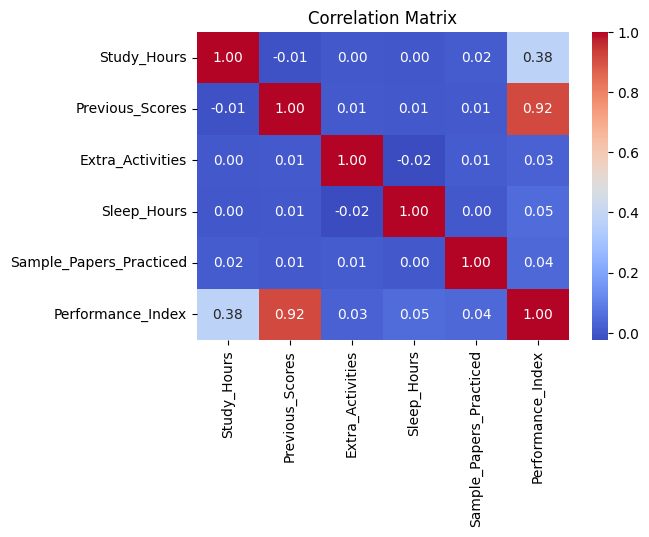

In [58]:
corr_matrix = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [59]:
X = df['Previous_Scores']
Y = df['Performance_Index']

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [80]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1), Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
Y_pred = lr.predict(X_test.values.reshape(-1,1))

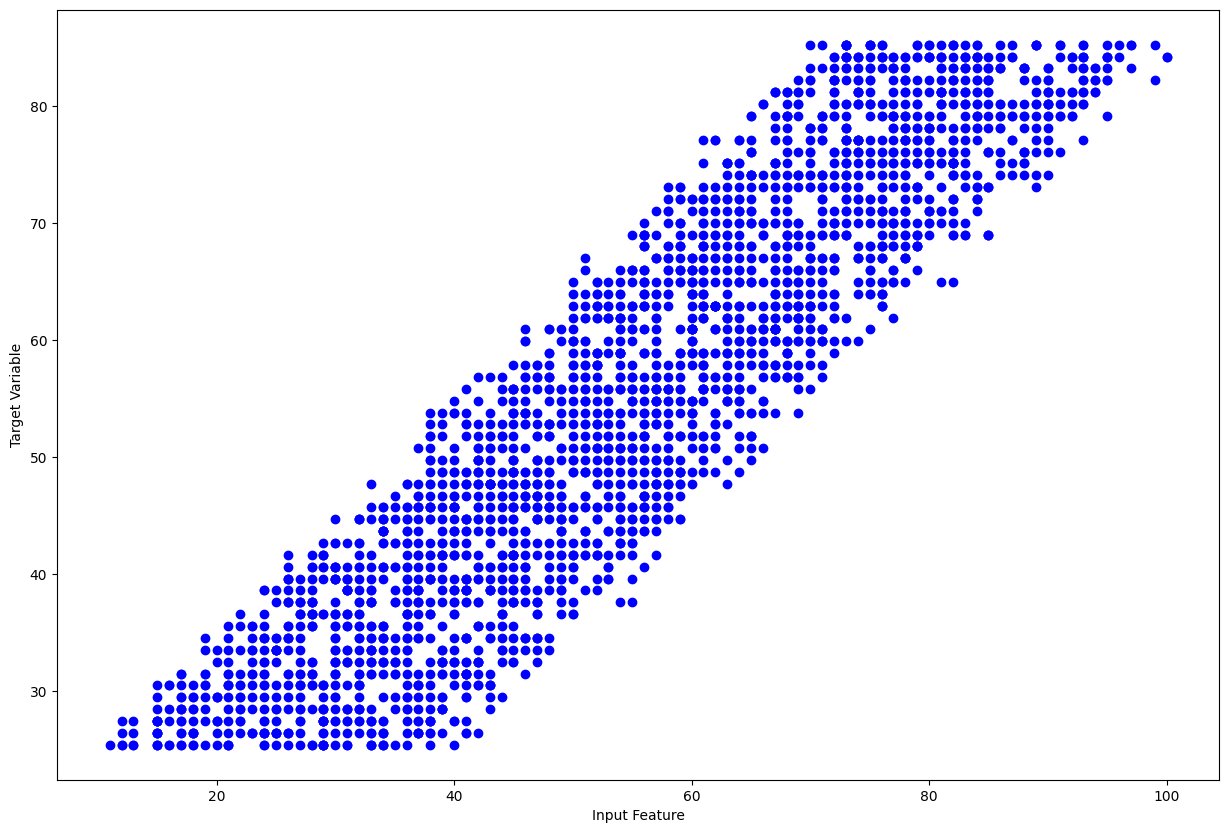

In [79]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_pred, color='blue')
plt.xlabel('Input Feature')
plt.ylabel('Target Variable')
plt.show()